In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random_state = 42   # random state for reproducibility

### Exploratory Data Analysis:

In [2]:
df = pd.read_csv('./data/MN-DS-news-classification.csv')

In [3]:
df.sample(3)

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
2661,3705,activistpost--2019-01-09--French Government Mo...,2019-01-09,activistpost,French Government Moves to Impose a Police Sta...,"Marking up the Arc de Triomphe, smashing the f...",Activist Post,https://www.activistpost.com/2019/01/french-go...,2019-01-09 17:38:45+00:00,1547073525,1567553196,"crime, law and justice",law
9298,175221,eveningstandard--2019-05-24--Happy birthday Li...,2019-05-24,eveningstandard,"Happy birthday, Lily-Rose Depp! How Vanessa Pa...",Lily-Rose Depp is quickly on her way to becomi...,Margaret Abrams,https://www.standard.co.uk/insider/style/how-l...,2019-05-24 18:01:47+00:00,1558735307,1567540192,human interest,people
470,78428,businessinsider--2019-02-07--INSIDER is hiring...,2019-02-07,businessinsider,INSIDER is hiring a Politics reporter to cover...,The ideal candidate brings with them an array ...,Anthony L. Fisher,https://www.businessinsider.com/insider-hiring...,2019-02-07 20:22:29+00:00,1549588949,1567549377,politics,political dissent


In [4]:
df['content_length'] = df['content'].apply(lambda x: len(x.split(' ')))

In [5]:
df_new = df[(df['content_length']<4000) & (df['content_length']>100)]

Text(0.5, 1.0, 'Content Length Distribution')

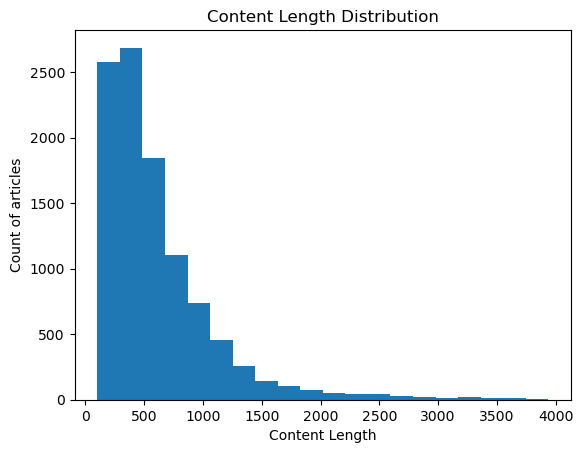

In [6]:
## create histplot with bin 
plt.hist(df_new['content_length'], bins=20)
plt.xlabel('Content Length')
plt.ylabel('Count of articles')
plt.title('Content Length Distribution')

In [7]:
df_new['content_length'].describe()

count    10217.000000
mean       610.067143
std        494.482851
min        101.000000
25%        291.000000
50%        471.000000
75%        759.000000
max       3936.000000
Name: content_length, dtype: float64

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10217 entries, 0 to 10916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           10217 non-null  int64 
 1   id                10217 non-null  object
 2   date              10217 non-null  object
 3   source            10217 non-null  object
 4   title             10217 non-null  object
 5   content           10217 non-null  object
 6   author            7202 non-null   object
 7   url               10217 non-null  object
 8   published         10217 non-null  object
 9   published_utc     10217 non-null  int64 
 10  collection_utc    10217 non-null  int64 
 11  category_level_1  10217 non-null  object
 12  category_level_2  10217 non-null  object
 13  content_length    10217 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


### Build tran_dev_test dataset.

In [9]:
target_column = ['data_id', 'source', 'content', 'title', 'category_level_1', 'category_level_2', 'content_length']
news_df = df_new[target_column] 
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
news_df.iloc[0, :]['content']

'(Natural News) Pancreatic cancer is one of the most daunting varieties of the disease, with very few people surviving beyond five years after their diagnosis. With few symptoms, most patients aren’t diagnosed until they’ve already reached the metastatic stage. It’s the fourth leading cause of cancer deaths and the 12th most common type of cancer worldwide, and an effective treatment is desperately needed. Now, a new discovery could bring hope to future patients.\n\nScientists at Tel Aviv University have developed a new treatment that could destroy pancreatic cancer cells. Their treatment involves a small molecule known as PJ34, which was originally developed to help stroke victims. They discovered that when it is injected, it causes human cancer cells to destroy themselves during cell division, or mitosis.\n\nThey conducted their study using transplanted human pancreatic cancer in immunocompromised mice. They found that after two weeks of daily injection with the molecule, there was a

In [11]:
# Define the sizes for train, dev, and test sets
train_size = 8400
dev_size = 600
test_size = 1000

# Split the DataFrame into train, dev, and test sets
train_set = news_df[:train_size]
dev_set = news_df[train_size:train_size + dev_size]
test_set = news_df[train_size + dev_size:]

# Optionally, you can save these sets into separate CSV files
train_set.to_csv('data/train_set.csv', index=False)
dev_set.to_csv('data/dev_set.csv', index=False)
test_set.to_csv('data/test_set.csv', index=False)
